#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

<font face="B Nazanin" size=4>
<span style="color: red;">
First_name=                                                                   "محمد آرمین "

Last_name=                                                                       "دهقان"

Student_number=                                                                 "۴۰۰۱۰۱۱۷۵"
</span>

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
86047

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

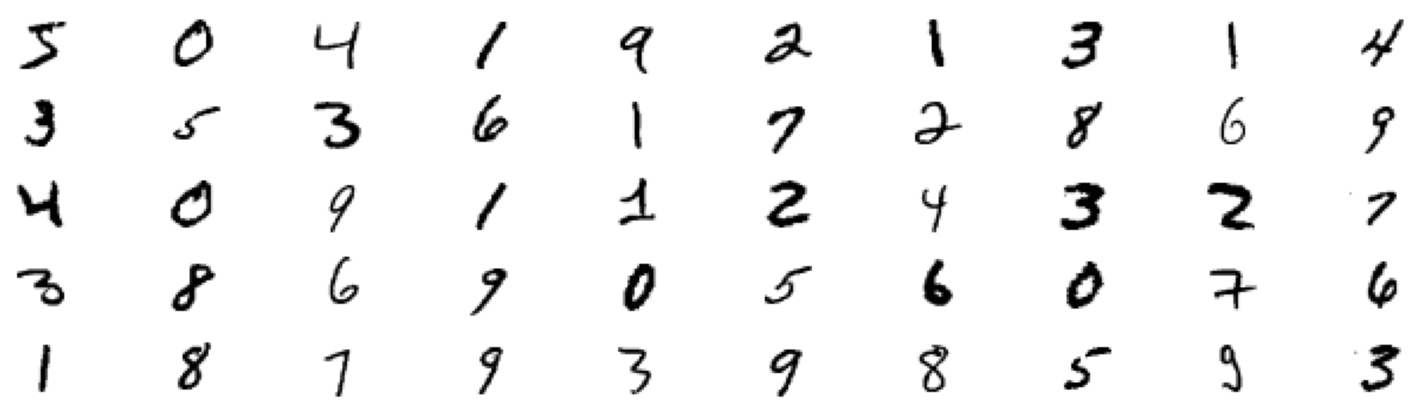

In [4]:
# here show 50 first of this images

def show_images(num_images, X):
    rows = (num_images // 10) + 1  
    fig, axes = plt.subplots(rows, 10, figsize=(15, 5))
    for i in range(num_images):
        row = i // 10
        col = i % 10
        axes[row, col].imshow(X[i], cmap='binary')
        axes[row, col].axis('off') 
    for i in range(num_images, rows * 10):
        row = i // 10
        col = i % 10
        fig.delaxes(axes[row, col])
    plt.tight_layout()
    plt.show()
show_images(50, X_train)


In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .

X_train = X_train.astype(np.float32)/255
max_value = X_train.max()
X_train = X_train / max_value

X_test = X_test.astype(np.float32)/255
max_value = X_test.max()
X_test = X_test / max_value


In [6]:
# Reshaping : 

X_train = X_train.reshape(X_train.shape[0], -1)

X_test = X_test.reshape(X_test.shape[0], -1)



In [7]:
# Calculate the mean along each feature (column)
feature_means = np.mean(X_train, axis=0)

# Center the data by subtracting the mean from each feature
X_train_centered = X_train - feature_means

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [8]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.


# each row : an image 
# each column : a pixel 

covariance_matrix = np.cov(X_train_centered, rowvar=False)  

In [9]:
# Calculating the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

In [10]:
# Sort eigenvalues and their corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [13]:
explained_variance = 0.9 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO

total_variance = np.sum(sorted_eigenvalues)
threshhold = explained_variance * total_variance

estimated_variance = 0
k=0

for eigenvalue in sorted_eigenvalues : 
    estimated_variance += eigenvalue
    k += 1
    if estimated_variance >= threshhold:
        break
k

#calculate the compression_ratio

87

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

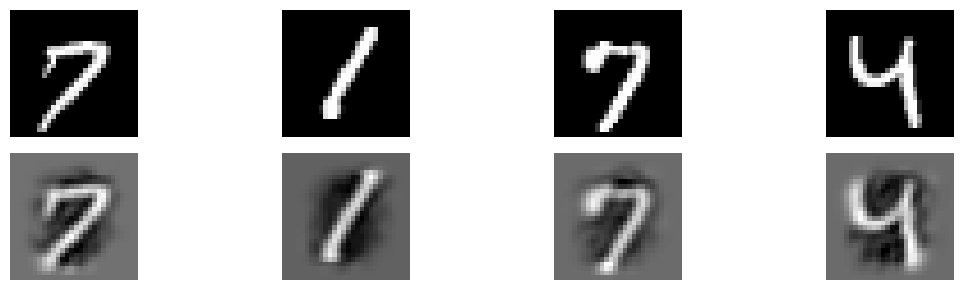

In [14]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

# Select the top k eigenvectors
top_eigenvectors = sorted_eigenvectors[: , :k]

# Project the original dataset into the reduced dimensionality eigenbasis
F = np.dot(X_train_centered, top_eigenvectors)

# Reproject F into the standard basis to obtain X_k
X_k = np.dot(F, top_eigenvectors.T)



sample_index = 4
one_sample_k = X_k[sample_index, :]

# Reshape it to a 28x28 matrix
one_sample_image = one_sample_k.reshape(28, 28)

# Plot the reprojected image


import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4 , figsize=(12, 3))

random_numbers = [random.randint(0, 783) for _ in range(4)]

axs[0,0].imshow(X_train[random_numbers[0]].reshape(28, 28), cmap='gray')
axs[0,1].imshow(X_train[random_numbers[1]].reshape(28, 28), cmap='gray')
axs[0,2].imshow(X_train[random_numbers[2]].reshape(28, 28), cmap='gray')
axs[0,3].imshow(X_train[random_numbers[3]].reshape(28, 28), cmap='gray')

axs[1,0].imshow(X_k[random_numbers[0], :].reshape(28, 28), cmap='gray')
axs[1,1].imshow(X_k[random_numbers[1], :].reshape(28, 28), cmap='gray')
axs[1,2].imshow(X_k[random_numbers[2], :].reshape(28, 28), cmap='gray')
axs[1,3].imshow(X_k[random_numbers[3], :].reshape(28, 28), cmap='gray')

for i in range (2):
    for j in range (4):
        axs[i, j].axis('off')  # Turn off axis labels and ticks


# Adjust the layout for better visualization
plt.tight_layout()

# Show the subplots
plt.show()


#TODO
#plot the dimentionally reduced data
#plot the original data

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#complete below function using python PCA function
def do_pca(n_components, X_train , X_test):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
    
    #Calculating the number of rows : 
    train_rows = X_train.shape[0]
    
    #concatinating two data_sets ( train and test ): 
    data = np.vstack((X_train,X_test))
    
    #Normalizing the data :
    scaler = StandardScaler()    
    normalized_data = scaler.fit_transform(data)
    
    #Spiliting the data :
    copy = np.split(normalized_data, [train_rows])
    
    #reconstructing the test data : 
    X_train_copy = copy[0]
    X_test_copy = copy[1]
    
    #Performing PCA : 
    pca = PCA(n_components=n_components)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    return X_train , X_test
  

In [30]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def ML_model(X_train , X_test , y_train , y_test , n_components):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    
    X_train , X_test = do_pca(n_components , X_train , X_test) 
    
    #Fitting : 
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    
    return acc



In [37]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []
i=0;
for pc in range(2,101):
    pc_list.append(pc)
    acc_list.append(ML_model(X_train , X_test , y_train , y_test , pc))
    print('Number of Component :', pc_list[i],'---- Accuracy : ' , acc_list[i]*100,'%')
    i +=1
    

Number of Component : 2 ---- Accuracy :  41.63 %
Number of Component : 3 ---- Accuracy :  49.51 %
Number of Component : 4 ---- Accuracy :  64.09 %
Number of Component : 5 ---- Accuracy :  75.51 %
Number of Component : 6 ---- Accuracy :  82.85 %
Number of Component : 7 ---- Accuracy :  86.53 %
Number of Component : 8 ---- Accuracy :  88.6 %
Number of Component : 9 ---- Accuracy :  89.5 %
Number of Component : 10 ---- Accuracy :  90.29 %
Number of Component : 11 ---- Accuracy :  90.72 %
Number of Component : 12 ---- Accuracy :  91.85 %
Number of Component : 13 ---- Accuracy :  92.73 %
Number of Component : 14 ---- Accuracy :  93.08 %
Number of Component : 15 ---- Accuracy :  93.10000000000001 %
Number of Component : 16 ---- Accuracy :  93.56 %
Number of Component : 17 ---- Accuracy :  93.53 %
Number of Component : 18 ---- Accuracy :  93.96 %
Number of Component : 19 ---- Accuracy :  93.87 %
Number of Component : 20 ---- Accuracy :  93.97 %
Number of Component : 21 ---- Accuracy :  94.22 

In [38]:
pc_list.append(101)
acc_list.append(ML_model(X_train , X_test , y_train , y_test , 101))
print('Number of Component :', pc_list[i],'---- Accuracy : ' , acc_list[i]*100,'%')

Number of Component : 101 ---- Accuracy :  93.4 %


<font size=4>
<span style="color: red;">
    
Be Aware that i used "RandomForestClassifier" as ML Model with the hyperparameter n_estimators=20 

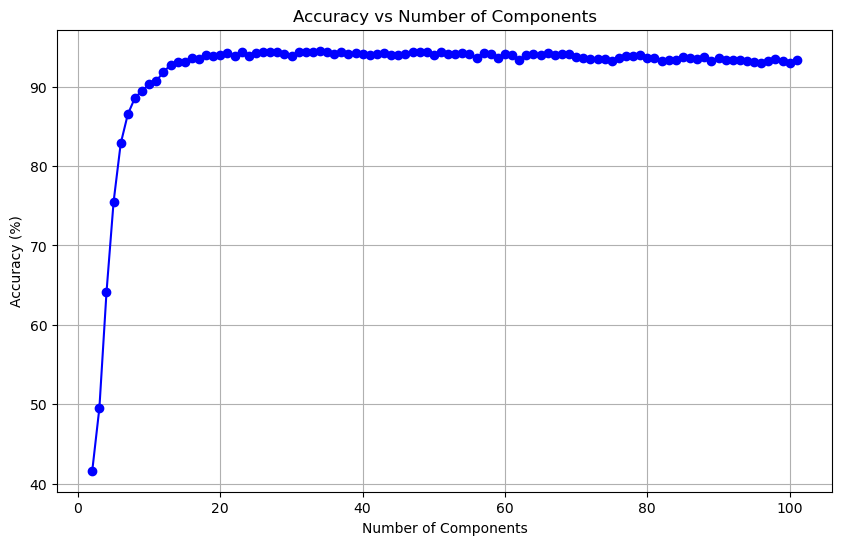

In [39]:
#plot the accuracy based on components.
#TODO

plt.figure(figsize=(10, 6))
plt.plot(pc_list, [acc * 100 for acc in acc_list], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

In [40]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_accuracy_index = acc_list.index(max(acc_list))
optimal_components = pc_list[max_accuracy_index]
max_accuracy = max(acc_list)

print("Number of components that maximize accuracy:", optimal_components)
print("Maximum accuracy:", max_accuracy * 100, "%")

Number of components that maximize accuracy: 34
Maximum accuracy: 94.53 %
